In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/wine.csv', header=None)
X = df.iloc[:, :12]
y = df.iloc[:,12]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [5]:
model = keras.Sequential()
model.add(keras.Input(shape=(12,)))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
MODEL_PATH = 'model/'

if not os.path.exists(MODEL_PATH):
    os.mkdir(MODEL_PATH)

modelpath = MODEL_PATH + "{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = keras.callbacks.ModelCheckpoint(filepath=modelpath, verbose=1)

In [8]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25
                    , verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to model\01-0.9469.hdf5

Epoch 2: saving model to model\02-0.9485.hdf5

Epoch 3: saving model to model\03-0.9492.hdf5

Epoch 4: saving model to model\04-0.9569.hdf5

Epoch 5: saving model to model\05-0.9492.hdf5

Epoch 6: saving model to model\06-0.9500.hdf5

Epoch 7: saving model to model\07-0.9646.hdf5

Epoch 8: saving model to model\08-0.9577.hdf5

Epoch 9: saving model to model\09-0.9500.hdf5

Epoch 10: saving model to model\10-0.9585.hdf5

Epoch 11: saving model to model\11-0.9631.hdf5

Epoch 12: saving model to model\12-0.9600.hdf5

Epoch 13: saving model to model\13-0.9500.hdf5

Epoch 14: saving model to model\14-0.9492.hdf5

Epoch 15: saving model to model\15-0.9515.hdf5

Epoch 16: saving model to model\16-0.9500.hdf5

Epoch 17: saving model to model\17-0.9615.hdf5

Epoch 18: saving model to model\18-0.9592.hdf5

Epoch 19: saving model to model\19-0.9623.hdf5

Epoch 20: saving model to model\20-0.9615.hdf5

Epoch 21: saving model to model\21-0.9692.hdf5



In [9]:
score=model.evaluate(X_test, y_test)
print('Test accuracy: %.2f' % (score[1]))

41/41 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9738
Test accuracy: 0.97


In [10]:
model = keras.Sequential()
model.add(keras.Input(shape=(12,)))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.446701,0.759559,0.385547,0.787692
1,0.360421,0.821914,0.327280,0.851538
2,0.319982,0.855787,0.297549,0.866923
3,0.291826,0.876315,0.271895,0.888462
4,0.271842,0.892738,0.253263,0.898462
...,...,...,...,...
1995,0.030591,0.991275,0.063945,0.993077
1996,0.030071,0.989736,0.064488,0.993077
1997,0.030630,0.988966,0.062813,0.990769
1998,0.029778,0.992045,0.066608,0.991538


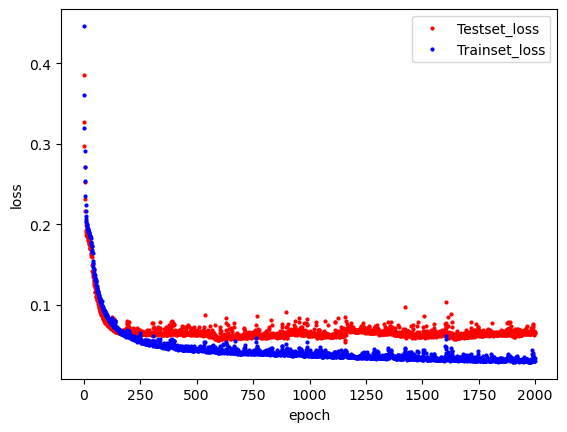

In [12]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss = hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()